# Predicting Housing Prices with Advanced Regression

### A Kaggle Competition

### 📃 The Problem

The goal of this project it to predict the sales price for each house in the provided data.

[**Competition Link**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

### 👩‍💻 The Approach

My initial approach will be to:
- Understand the data (*what variables are in the data set?*)
- Identify any missing, incomplete or invalid data
- Visualise the data to get an understanding of the relationship between variables
- Idenitfy the most appropriate model to use to solve the problem (*predicting housing prices*)
- Train selected model
- Evaluate and Improve Model where required
- Prepare a version for deployment



### 📚 Libraries

In [46]:
import os
# from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
import numpy as np


### 🔠 The Data

In [112]:
api = KaggleApi()
api.authenticate()

In [113]:
api.competition_download_files('house-prices-advanced-regression-techniques')

In [114]:
zf = ZipFile('house-prices-advanced-regression-techniques.zip')
zf.extractall('data/')
zf.close()

In [115]:
os.remove('house-prices-advanced-regression-techniques.zip')

In [880]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [881]:
print(test_data.shape)
print(train_data.shape)

(1459, 80)
(1460, 81)


In [882]:
print(f"There are {len(train_data.columns)-1} different features for us to explore and they are: {train_data.columns[1:]}")

There are 80 different features for us to explore and they are: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [883]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [884]:
train_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Dealing with missing values

Initially i can see in there are many columns with missing data.

In [885]:
null_columns = train_data.columns[train_data.isnull().any()]
null_counts = train_data[null_columns].isnull().sum()
print(null_counts)
# here we can see that there are some columns that have large amounts of 
# missing values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


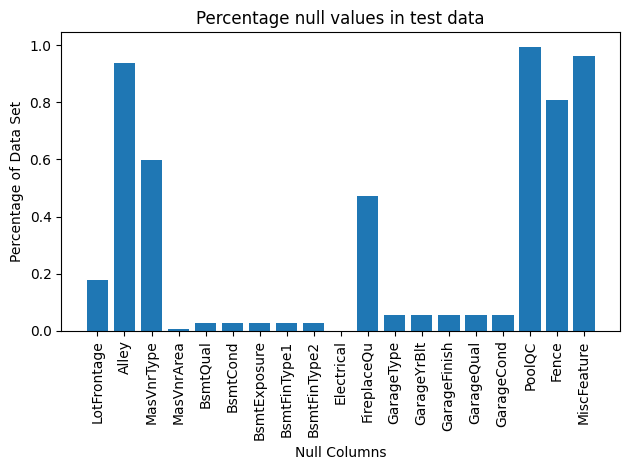

In [886]:
# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(train_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

From the above graph we can see that immediately we can drop some columns as they have a significantly large amount of missing data. For this project i will remove anything higher than 20% of data missing.

In [887]:
col_to_drop =[]

for k,v in null_counts_dict.items():
    if v > 0.2:
        col_to_drop.append(k)

print(col_to_drop)

train_data = train_data.drop(columns =col_to_drop)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


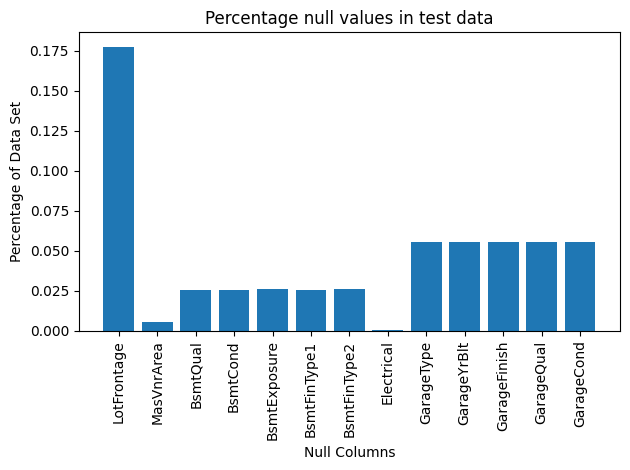

In [888]:
null_columns = train_data.columns[train_data.isnull().any()]
null_counts = train_data[null_columns].isnull().sum()

# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(test_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


Now we have the above columns to address, in this instance i will be referring to the documentation about the data set to decide how i should impute the missing values

**Starting with MSZoning**

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Imputation method: most common

In [889]:
# pandas value_counts outputs to descending order
train_data['MSZoning'].fillna(train_data['MSZoning'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['MSZoning'].isnull().sum()} null values for MSZoning")


Confirming there are 0 null values for MSZoning


**LotFrontage**

LotFrontage: Linear feet of street connected to property

Imputation method: mean

In [890]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(),inplace=True)

print(f"Confirming there are {train_data['LotFrontage'].isnull().sum()} null values for LotFrontage")

Confirming there are 0 null values for LotFrontage


**Utilities**

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

Imputation method:most common

In [891]:
train_data['Utilities'].fillna(train_data['Utilities'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['Utilities'].isnull().sum()} null values for Utilities")

Confirming there are 0 null values for Utilities


**MasVnrArea**

MasVnrArea: Masonry veneer area in square feet

Imputation method: mean

In [892]:
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(),inplace=True)

print(f"Confirming there are {train_data['MasVnrArea'].isnull().sum()} null values for MasVnrArea")

Confirming there are 0 null values for MasVnrArea


**BsmtQual**

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Imputation method: most common

In [893]:
train_data['BsmtQual'].fillna(train_data['BsmtQual'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['BsmtQual'].isnull().sum()} null values for BsmtQual")

Confirming there are 0 null values for BsmtQual


**BsmtCond**

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Imputation method: most common

In [894]:
train_data['BsmtCond'].fillna(train_data['BsmtCond'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['BsmtCond'].isnull().sum()} null values for BsmtCond")

Confirming there are 0 null values for BsmtCond


**BsmtExposure**

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Imputation method: most common

In [895]:
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['BsmtExposure'].isnull().sum()} null values for BsmtExposure")

Confirming there are 0 null values for BsmtExposure


**BsmtFinType1**

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Imputation method: most common

In [896]:

train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['BsmtFinType1'].isnull().sum()} null values for BsmtFinType1")

Confirming there are 0 null values for BsmtFinType1


**BsmtFinType2**

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Imputation: most common

In [897]:
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['BsmtFinType2'].isnull().sum()} null values for BsmtFinType2")

Confirming there are 0 null values for BsmtFinType2


**GarageType**

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Imputation: most common

In [898]:
train_data['GarageType'].fillna(train_data['GarageType'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['GarageType'].isnull().sum()} null values for GarageType")

Confirming there are 0 null values for GarageType


**GarageFinish**

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Imputation: most common

In [899]:
train_data['GarageFinish'].fillna(train_data['GarageFinish'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['GarageFinish'].isnull().sum()} null values for GarageFinish")

Confirming there are 0 null values for GarageFinish


**GarageQual**

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Imputation: most common

In [900]:
train_data['GarageQual'].fillna(train_data['GarageQual'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['GarageQual'].isnull().sum()} null values for GarageQual")

Confirming there are 0 null values for GarageQual


**GarageCond**

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Imputation: most common

In [901]:
train_data['GarageCond'].fillna(train_data['GarageCond'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {train_data['GarageCond'].isnull().sum()} null values for GarageCond")

Confirming there are 0 null values for GarageCond


**GarageYrBlt**

GarageYrBlt: Year garage was built

imputation method: default to year built for property

In [902]:
train_data['GarageYrBlt'].fillna(train_data['YearBuilt'],inplace= True)

print(f"Confirming there are {train_data['GarageYrBlt'].isnull().sum()} null values for GarageYrBlt")

Confirming there are 0 null values for GarageYrBlt


Now lets check our progress below. It seems there are only a few missing values left

I am going to check the number of rows this has, to see if its appropriate to drop these rows

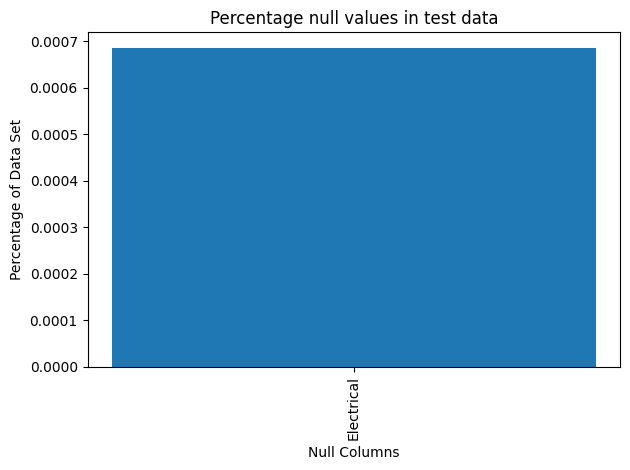

In [903]:
null_columns = train_data.columns[train_data.isnull().any()]
null_counts = train_data[null_columns].isnull().sum()

# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(train_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

In [904]:
train_data[train_data.isnull().any(axis=1)].shape[0]
print(f"There are only {train_data[train_data.isnull().any(axis=1)].shape[0]} rows that have null values, this represents {train_data[train_data.isnull().any(axis=1)].shape[0]/len(train_data)}% of the dataset")

There are only 1 rows that have null values, this represents 0.0006849315068493151% of the dataset


In [905]:
train_data.dropna(inplace=True)
print(train_data.shape)

(1459, 75)


In [906]:
# Removing SalePrice
sale_price = train_data['SalePrice']

train_data.drop('SalePrice', axis=1, inplace=True)

#### Secondly i will start by identifying outliers

normally i would split data by data type and identify outliers for numerical data, however i have noticed there is categorical data that is displayed as numbers.

For example *MSSubClass*:


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

To deal with this i read the data_description file and seperated the data into categorical and numerical, will leave out sale price for this part

In [907]:
cat_col= [
        'MSSubClass'
        ,'MSZoning'
        ,'Street'
        ,'Alley'
        ,'LotShape'
        ,'LandContour'
        ,'Utilities'
        ,'LotConfig'
        ,'LandSlope'
        ,'Neighborhood'
        ,'Condition1'
        ,'Condition2'
        ,'BldgType'
        ,'HouseStyle'
        ,'OverallQual'
        ,'OverallCond'
        ,'RoofStyle'
        ,'RoofMatl'
        ,'MasVnrType'
        ,'ExterQual'
        ,'ExterCond'
        ,'Foundation'
        ,'BsmtQual' #check na condition
        ,'BsmtCond'
        ,'BsmtExposure'
        ,'BsmtFinType1'
        ,'BsmtFinType2'
        ,'Heating'
        ,'HeatingQC'
        ,'CentralAir'
        ,'Electrical'
        ,'KitchenQual'
        ,'Functional'
        ,'FireplaceQu' #- check n/a
        ,'GarageType'
        ,'GarageFinish'
        ,'GarageQual'
        ,'GarageCond'
        ,'PavedDrive'
        ,'PoolQC'
        ,'Fence'
        ,'MiscFeature'
        ,'SaleType'
        ,'SaleCondition'
        ,'Exterior1st'
        ,'Exterior2nd'
        ,'YearBuilt'
        ,'YearRemodAdd'
        ,'GarageYrBlt'
        ,'YrSold'
        ,'MoSold'
       
        ]
cat_col = [x for x in cat_col if x not in col_to_drop]

In [908]:
num_col= [
        'LotFrontage'
        ,'LotArea'
        ,'BsmtFinSF1'
        ,'BsmtFinSF2'
        ,'BsmtUnfSF' # basement might be able to be aggregated into one col
        ,'TotalBsmtSF'
        ,'1stFlrSF'
        ,'2ndFlrSF'
        ,'LowQualFinSF'
        ,'GrLivArea'
        ,'BsmtFullBath'
        ,'BsmtHalfBath'
        ,'FullBath'
        ,'HalfBath'
        ,'BedroomAbvGr'
        ,'KitchenAbvGr'
        ,'TotRmsAbvGrd'
        ,'GarageCars'
        ,'GarageArea'
        ,'WoodDeckSF'
        ,'OpenPorchSF'
        ,'EnclosedPorch'
        ,'3SsnPorch'
        ,'ScreenPorch'
        ,'PoolArea'
        ,'MiscVal'
        ,'LotFrontage'
        ,'MasVnrArea'
       

        
        ]

num_col = [x for x in num_col if x not in col_to_drop]

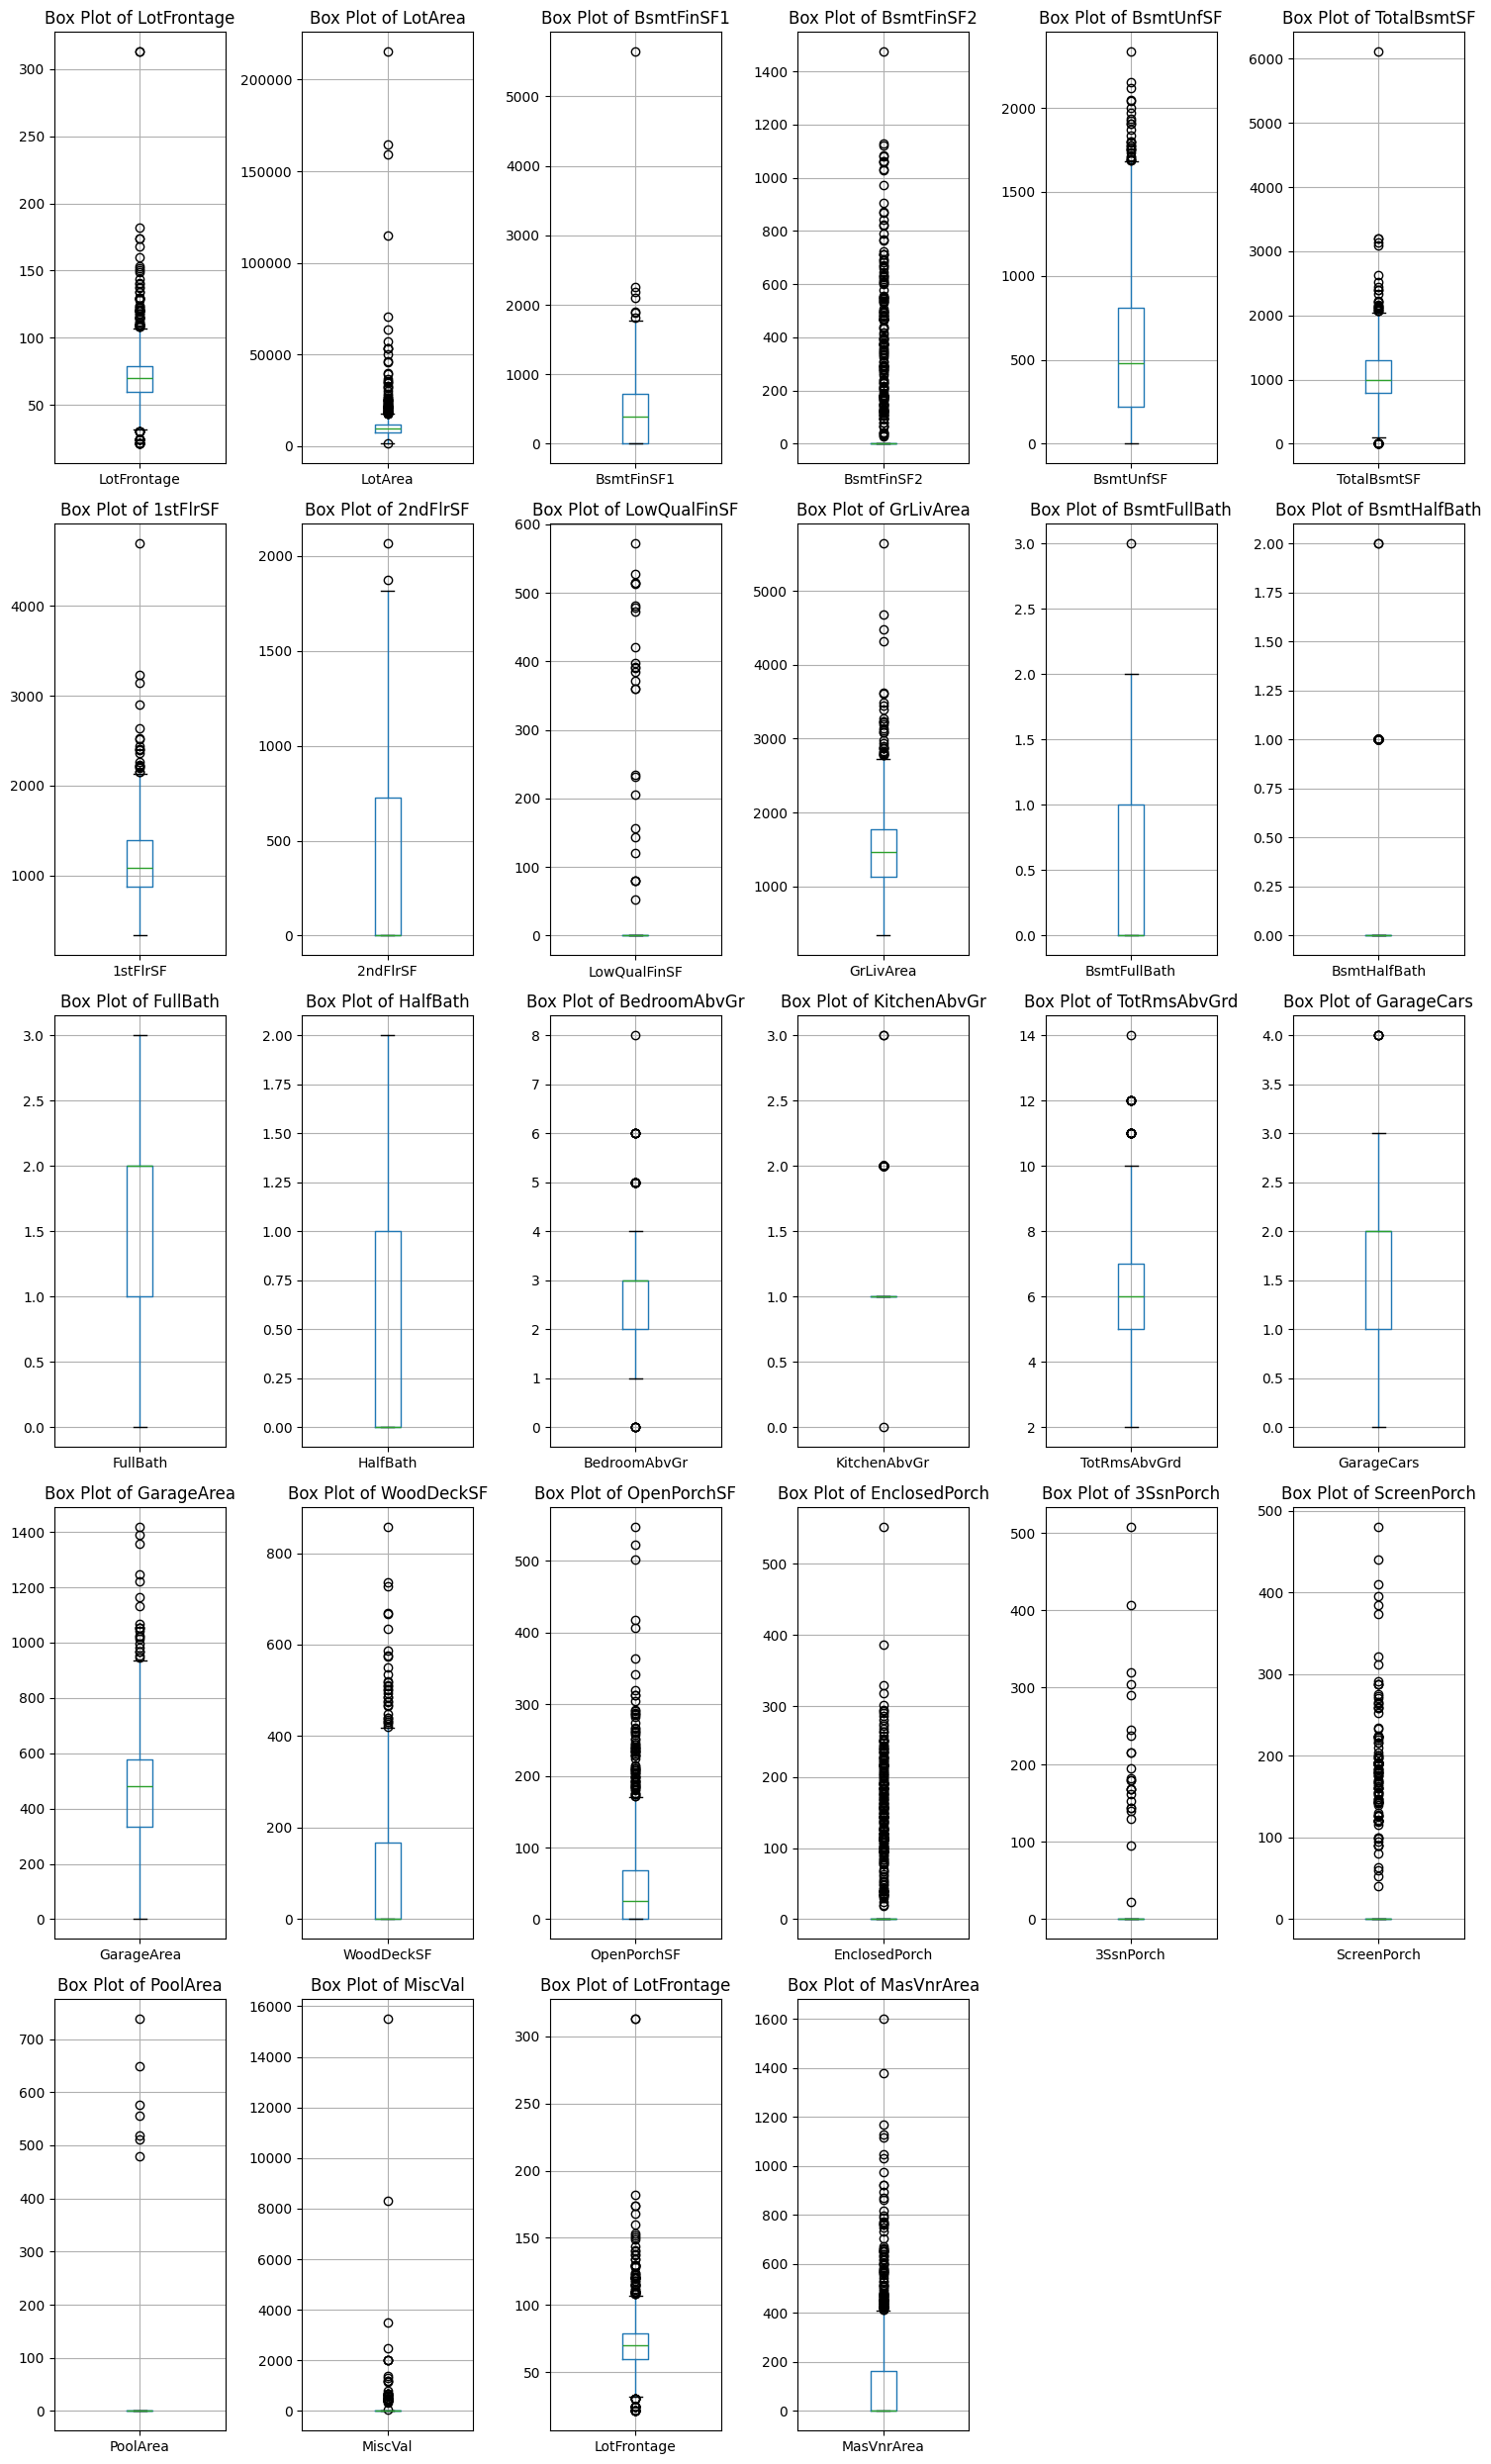

In [909]:
# First to get all numerical columns from the data that have outliers (abs(zscore)>=3)
# outlier_cols =[]
# for col in num_col:
#     zscores = stats.zscore(train_data[col])
#     if all(abs(x) <= 3 for x in zscores):
#         outlier_cols.append(col)

# This code defines a grid to add box plots to
num_plots = len(num_col)
num_cols =6
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(num_col):  
    ax = axes[i]
    train_data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

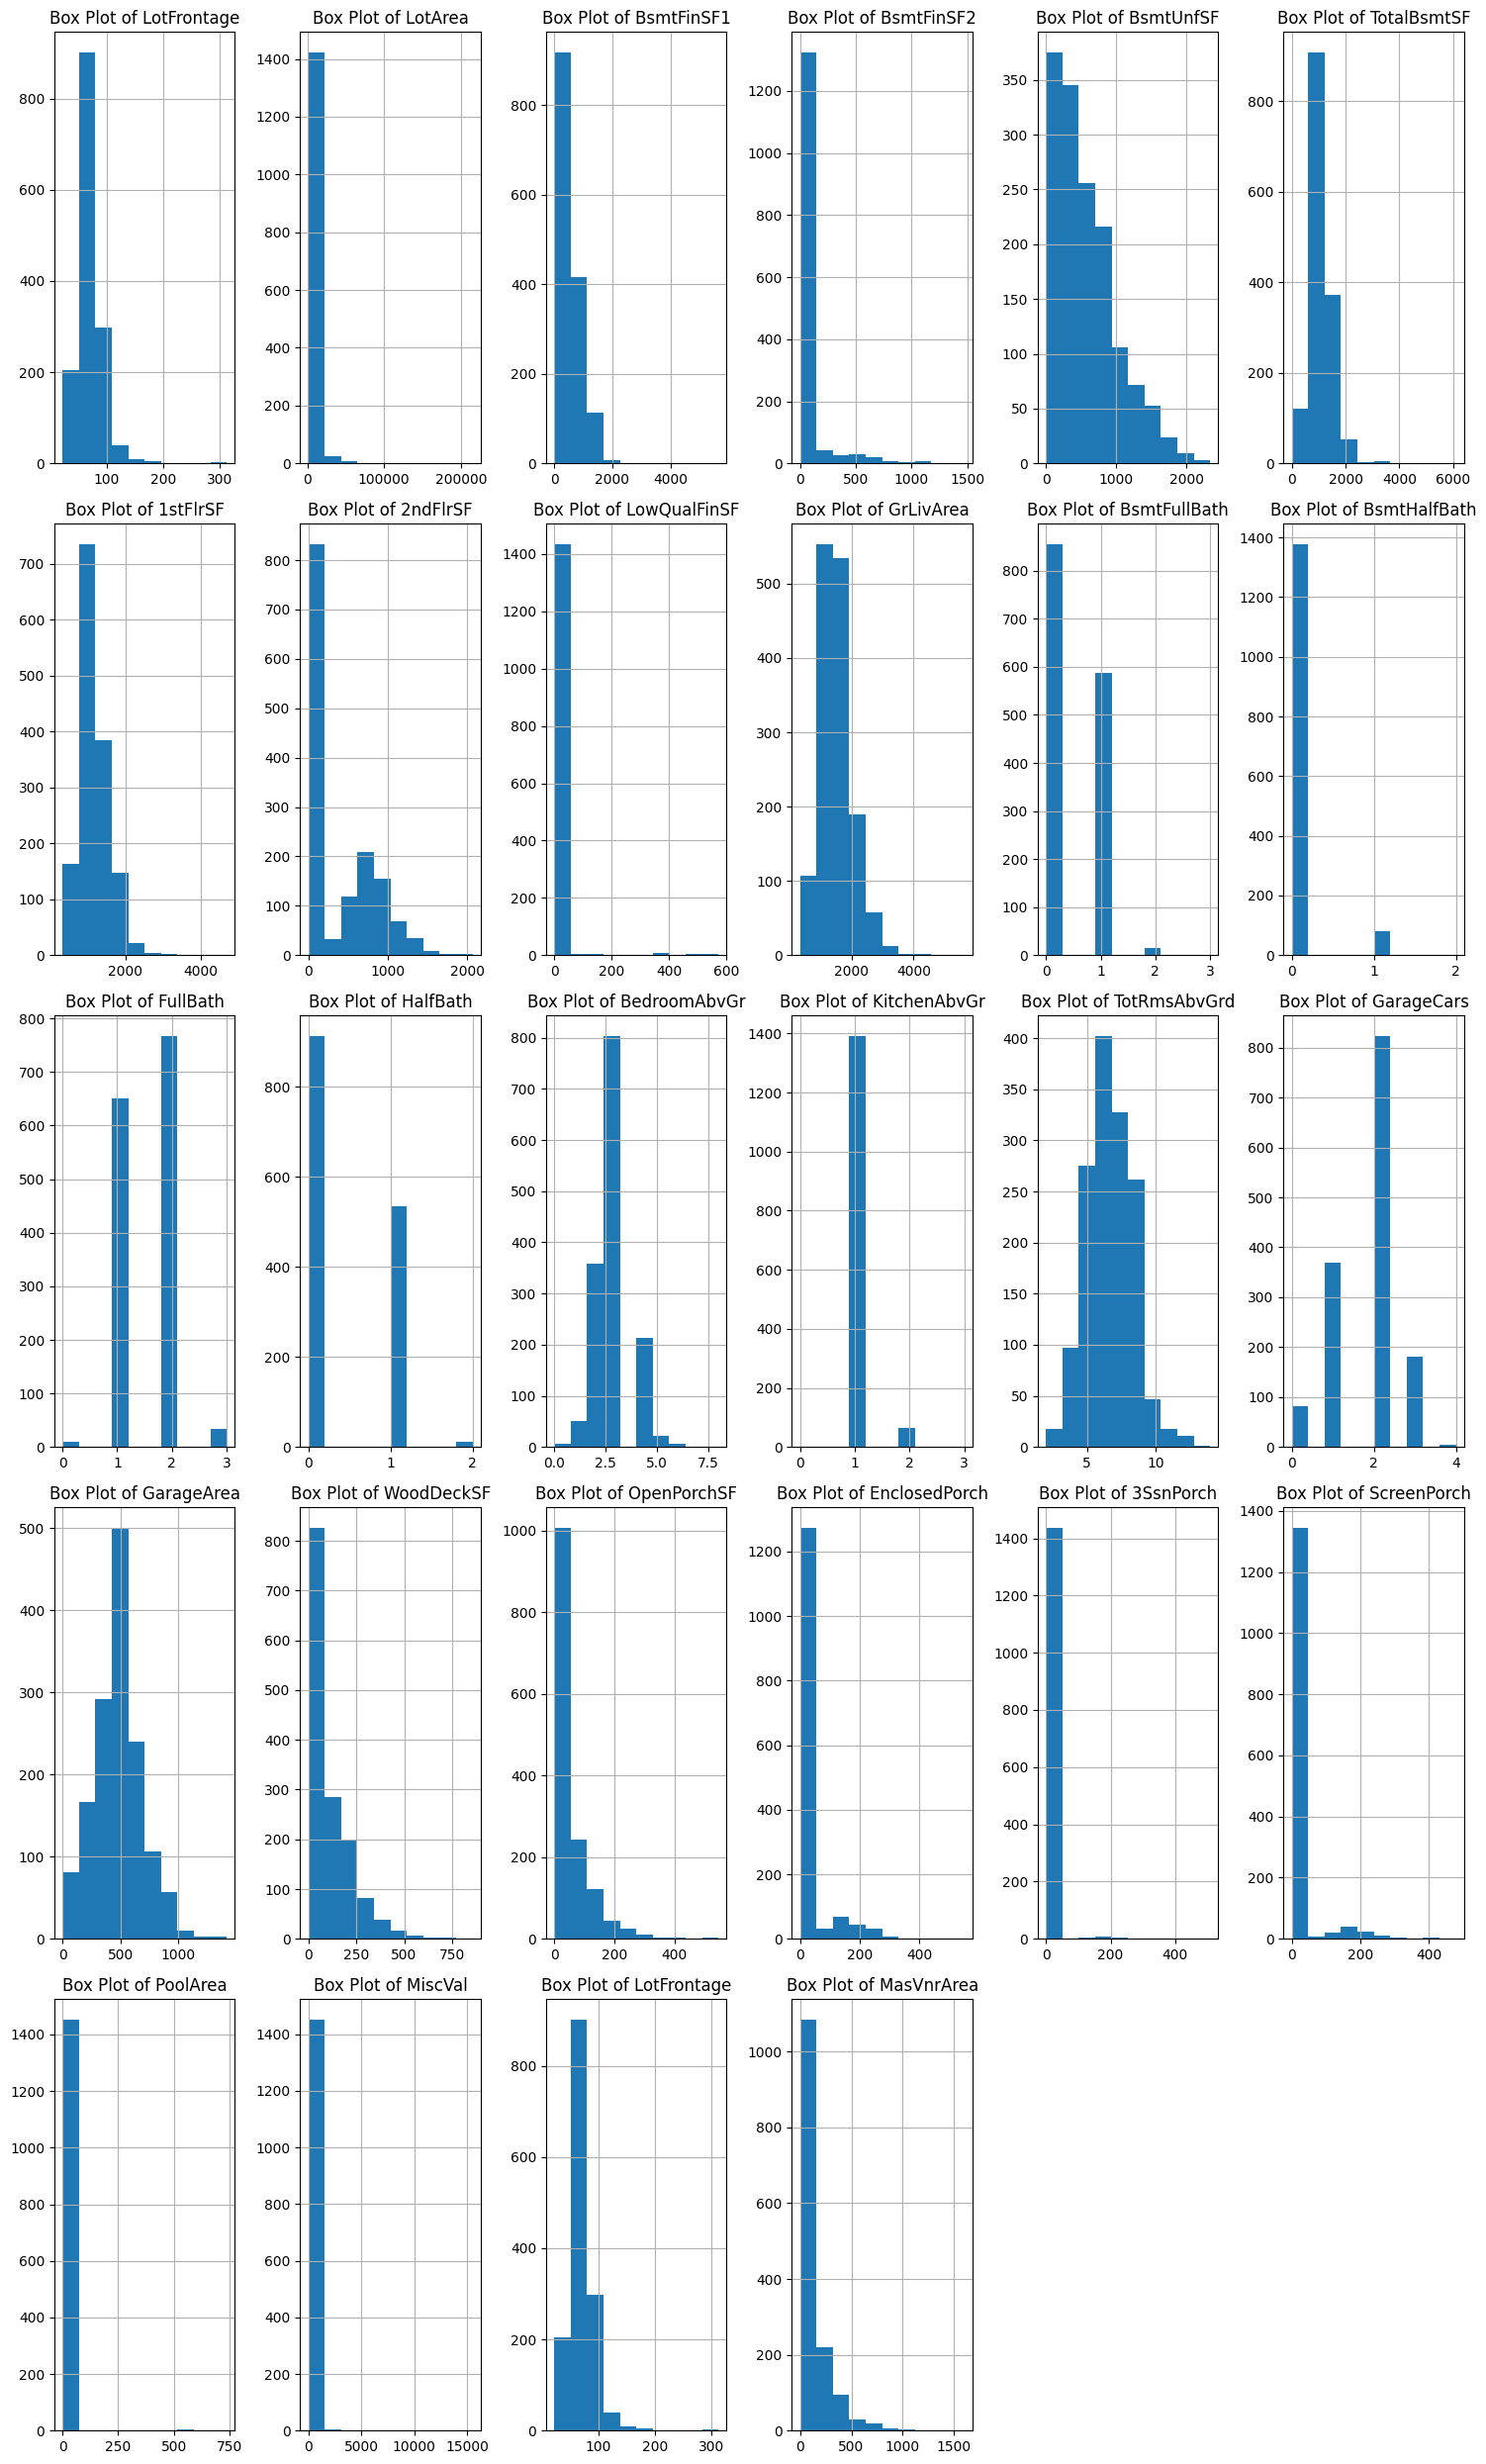

In [910]:
num_plots = len(num_col)
num_cols =6
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(num_col):  
    ax = axes[i]
    train_data.hist(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

The distribution appears to be skewed and non-normal. In this case i will apply a normalisation technique of min-max scaling the each feature, then i will take the log to standardise the data

In [911]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()


for col in num_col:
    # scaled=scaler.fit_transform(train_data[col].values.reshape(-1, 1))
    train_data[col] =scaler.fit_transform(train_data[[col]])

    
    

In [912]:
train_data[num_col].head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea
0,0.150685,0.033420,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.150685,0.12250
1,0.202055,0.038795,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.202055,0.00000
2,0.160959,0.046507,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.160959,0.10125
3,0.133562,0.038561,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.133562,0.00000
4,0.215753,0.060576,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.215753,0.21875


### 😸 Handling Categorical Data

I want to ensure that for some categorical variables the model can take into account the relationship the categories have with each other.

To do this i will refer to the data description file and take all the attributes that have need to be ordinal and dummy data will be in place for the rest

Referring to the description file is also important at this stage as not all categories are present in the dat

In [913]:
# this varible is for my reference so i know what columns i can remvoe from cat_cols
ordinal_col =[
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'FireplaceQu',
    'GarageYrBlt',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'PoolQC',
    'Fence'
]

ordinal_col = [x for x in ordinal_col if x not in col_to_drop]


In [914]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder


In [915]:
# Create reference dictionary for encoded variables
reference_dict={}

In [916]:
# Processing numerical categories

# OverallQual
train_data['OverallQual'] =train_data['OverallQual']/len(train_data['OverallQual'].unique())
reference_dict['OverallQual'] = [('Very Excellent',1),
                                 ('Excellent',.9),
                                 ('Very Good',.8),
                                 ('Good',.7),
                                 ('Above Average',.6),
                                 ('Average',.5),
                                 ('Below Average',.4),
                                 ('Fair',.3),
                                 ('Poor',.2),
                                 ('Very Poor',.1),
                                 ]


# OverallCond
train_data['OverallCond'] =train_data['OverallCond']/len(train_data['OverallCond'].unique())
reference_dict['OverallCond'] = [('Very Excellent',1),
                                 ('Excellent',.9),
                                 ('Very Good',.8),
                                 ('Good',.7),
                                 ('Above Average',.6),
                                 ('Average',.5),
                                 ('Below Average',.4),
                                 ('Fair',.3),
                                 ('Poor',.2),
                                 ('Very Poor',.1),
                                 ]

# MS Subclass

In [917]:
# Processing years

# YearBuilt
categories =[x for x in train_data['YearBuilt'].unique().tolist()]
categories.sort()
enc = OrdinalEncoder(categories=[categories])
train_data['YearBuilt']=enc.fit_transform(train_data[['YearBuilt']])/len(categories)
reference_dict['YearBuilt'] = [(key,(val+1)/len(categories)) for val,key in enumerate(categories)]


# 'YearRemodAdd'
categories =[x for x in train_data['YearRemodAdd'].unique().tolist()]
categories.sort()
enc = OrdinalEncoder(categories=[categories])
train_data['YearRemodAdd']=enc.fit_transform(train_data[['YearRemodAdd']])/len(categories)
reference_dict['YearRemodAdd'] = [(key,(val+1)/len(categories)) for val,key in enumerate(categories)]

# GarageYrBlt
categories =[x for x in train_data['GarageYrBlt'].unique().tolist()]
categories.sort()
enc = OrdinalEncoder(categories=[categories])
train_data['GarageYrBlt']=enc.fit_transform(train_data[['GarageYrBlt']])/len(categories)
reference_dict['GarageYrBlt'] = [(key,(val+1)/len(categories)) for val,key in enumerate(categories)]


In [918]:
# Manual Sorting

# ExterQual
categories =['Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['ExterQual'] =x
for key,val in x:
    train_data['ExterQual']=train_data['ExterQual'].replace(key,val)



# ExterCond
categories =['Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['ExterCond'] =x
for key,val in x:
    train_data['ExterCond']=train_data['ExterCond'].replace(key,val)


# BsmtQual
categories =['NA','Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['BsmtQual'] =x
for key,val in x:
    train_data['BsmtQual']=train_data['BsmtQual'].replace(key,val)

# BsmtCond
categories =['NA','Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['BsmtCond'] =x
for key,val in x:
    train_data['BsmtCond']=train_data['BsmtCond'].replace(key,val)

# BsmtExposure
categories =['NA','No','Mn','Av','Gd']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['BsmtExposure'] =x
for key,val in x:
    train_data['BsmtExposure']=train_data['BsmtExposure'].replace(key,val)


# BsmtFinType1
categories =['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['BsmtFinType1'] =x
for key,val in x:
    train_data['BsmtFinType1']=train_data['BsmtFinType1'].replace(key,val)


# BsmtFinType2
categories =['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['BsmtFinType2'] =x
for key,val in x:
    train_data['BsmtFinType2']=train_data['BsmtFinType2'].replace(key,val)

# HeatingQC
categories =['Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['HeatingQC'] =x
for key,val in x:
    train_data['HeatingQC']=train_data['HeatingQC'].replace(key,val)


# KitchenQual
categories =['Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['KitchenQual'] =x
for key,val in x:
    train_data['KitchenQual']=train_data['KitchenQual'].replace(key,val)

# GarageFinish
categories =['NA','Unf','RFn','Fin']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['GarageFinish'] =x
for key,val in x:
    train_data['GarageFinish']=train_data['GarageFinish'].replace(key,val)


# GarageQual
categories =['NA','Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['GarageQual'] =x
for key,val in x:
    train_data['GarageQual']=train_data['GarageQual'].replace(key,val)

# GarageCond
categories =['NA','Po','Fa','TA','Gd','Ex']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['GarageCond'] =x
for key,val in x:
    train_data['GarageCond']=train_data['GarageCond'].replace(key,val)

# PavedDrive
categories =['N','P','Y']
x=[(key,(val+1)/len(categories)) for val,key in enumerate(categories)]
reference_dict['PavedDrive'] =x
for key,val in x:
    train_data['PavedDrive']=train_data['PavedDrive'].replace(key,val)

In [919]:
reference_dict.keys()

dict_keys(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'])

Now to move onto the rest of the categorical variables.

We have a problem here, if we want to use one hot encoding on the reamining variables there may be an instance where we are left with too big of a dataframe with all the possible categories.

In this case to minimise the number of columns we can take the top 10 5 categories between each variable

In [920]:
total_cat=0
highest_cat =0
highest_var = ""

for col in cat_col:
   tmp = train_data[col].unique().tolist()
   if len(tmp)-1 > highest_cat:
      highest_cat = len(tmp)-1
      highest_var = col
   total_cat+=len(tmp)-2

print(f"The total number of columns added to the dataset would be {total_cat} with the highest number of categories being {highest_var} with {highest_cat}")

The total number of columns added to the dataset would be 466 with the highest number of categories being YearBuilt with 111


In this case i am going to try using dummy variables first so the vector isnt so big then i can revisit this stage if i beleive it will improve performance

In [921]:
def label_encoder (col):
    le = LabelEncoder()
    # Transform column
    train_data[col] = le.fit_transform(train_data[col])
    # add encoding to reference dictionary
    reference_dict[col] =[(k,v) for k,v in zip(le.inverse_transform(train_data[col].unique()),train_data[col].unique())]
    for idx,val in enumerate(reference_dict[col]):
        reference_dict[col][idx]=(val[0],val[1]/len(train_data[col].unique()))
    
    # scale the dictionary of values
        
    train_data[col] = train_data[col]/len(train_data[col].unique())
    # scale the dataframe column values

for col in cat_col:
    label_encoder(col)

### 💲 Adding back Sale Price and checking normality of prediction variable

Now to check if we need to normalise the predictor variable

In [922]:
train_data =train_data.merge(sale_price.rename('salePrice'), left_index=True, right_index=True, how='left')

array([[<Axes: title={'center': 'salePrice'}>]], dtype=object)

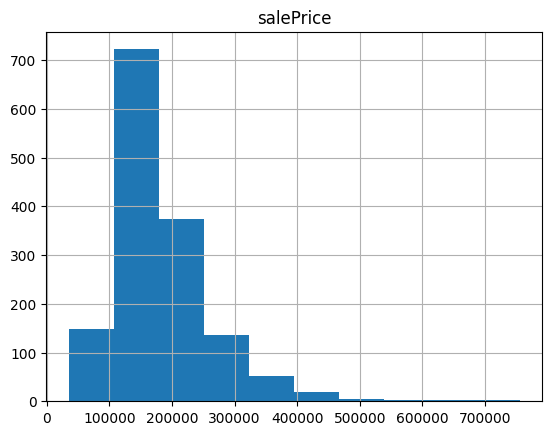

In [923]:
train_data.hist(column='salePrice')

The data doesnt appear to be normal, however if we take the log of the sale prices it might be normal

In [924]:
train_data['logPrice'] =np.log(train_data.salePrice)

array([[<Axes: title={'center': 'logPrice'}>]], dtype=object)

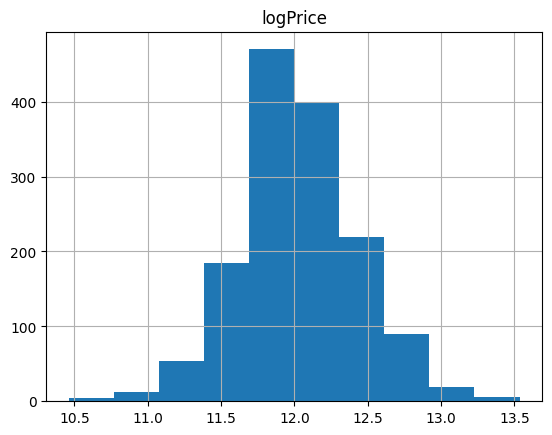

In [925]:
train_data.hist(column='logPrice')

Data appears normal and data is ready for feature extraction


### 🛠 experimenting with models


My first assumptiuons is that the predictors in the data is linear with the response variable (*sale price*)

First i will need to create a function to transform the test data so i can use different models

In [926]:
from transform_data import transform_clean_data    

In [927]:
test_data_cleaned, reference_dict =transform_clean_data(test_data)

Identifying null columns
Dropped these columns  ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Filling NaN Values
Dropping NaN Rows
Normalise numerical data
encoding categorical data


In [928]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [929]:
y =train_data.logPrice
train_data=train_data.drop(columns= ['salePrice','logPrice'])

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.15, random_state=42)


In [930]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [931]:
predicted = regr.predict(X_test)

In [933]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, r2_score


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predicted)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.017825288156124337
R-squared (R2) Score: 0.8900832103359809


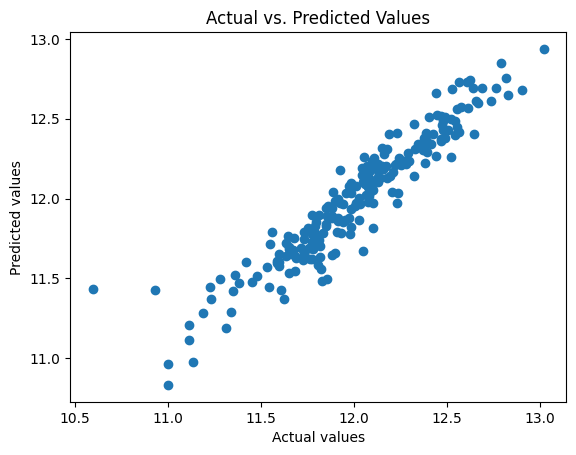

In [934]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [935]:
from sklearn.decomposition import PCA

In [974]:
performance ={}
for n in range(2,len(train_data.columns)+1):
    
    # Apply PCA for dimensionality reduction
    pca =PCA(n_components=n)
    X_pca = pca.fit_transform(train_data)

    # split into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # perform linear regression

    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)

    # make predictions:
    y_pred = regr.predict(X_test)

    # evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    loadings =pd.DataFrame(pca.components_.T,columns = ["PC"+str(x) for x in range(1,n+1)],index=train_data.columns.tolist())
    
    # add performance to list
    performance[n] =[mse,r2,loadings]

In [975]:
components = performance.keys()
mse_values = [result[0] for result in performance.values()]
r2_values = [result[1] for result in performance.values()]

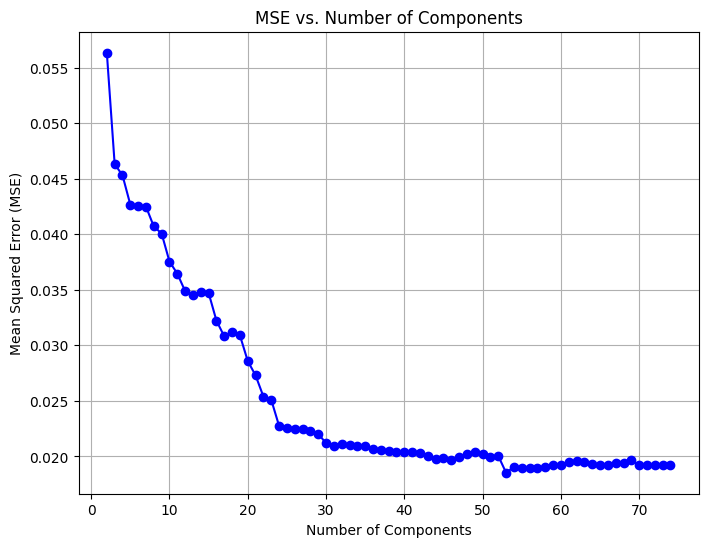

In [976]:
# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(components, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

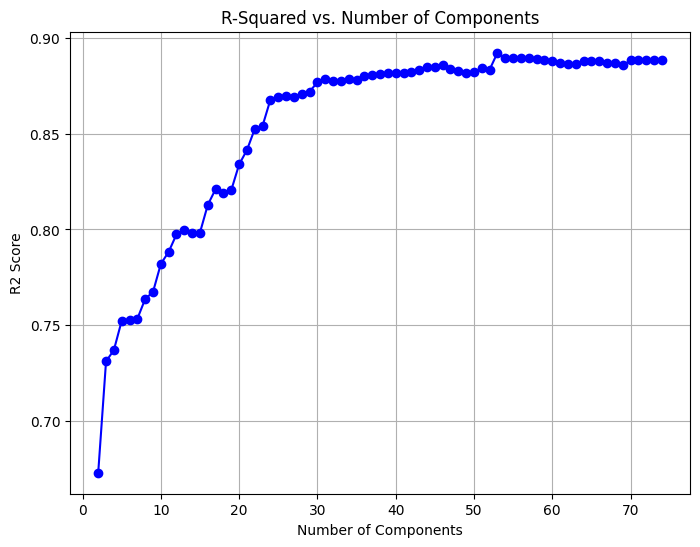

In [977]:
# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(components, r2_values, marker='o', linestyle='-', color='b')
plt.title('R-Squared vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

In [978]:
lowest_mse=1
pca_n_mse=""
highest_r2 =0
pca_n_r2=""

for k,tup in performance.items():
    if tup[0] < lowest_mse:
        lowest_mse = tup[0]
        pca_n_mse = k
    
    if tup[1] > highest_r2:
        highest_r2=tup[1]
        pca_n_r2 = k

In [979]:
print(f"The highest r-squared performance is {highest_r2} with {pca_n_r2} componenets")

The highest r-squared performance is 0.8924115106023373 with 53 componenets


In [980]:
print(f"The lowest mean-square error is {lowest_mse} with {pca_n_mse} componenets")

The lowest mean-square error is 0.018531814662207043 with 53 componenets


In [983]:
performance[53][2].head(100)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
Id,1.000000e+00,0.000030,0.000011,-0.000009,-0.000039,0.000015,0.000004,-0.000022,0.000021,0.000013,...,0.000002,0.000007,0.000006,-0.000004,0.000006,0.000011,0.000005,0.000005,-0.000004,0.000002
MSSubClass,1.171469e-05,0.009167,-0.059439,0.208318,0.547375,0.226925,-0.122810,0.055796,0.313734,0.109357,...,0.050525,0.017167,-0.063638,-0.297335,-0.028697,0.371888,-0.052860,0.094681,-0.130286,0.038542
MSZoning,-1.816220e-06,-0.028548,0.050079,-0.011797,0.008346,-0.001678,-0.045366,-0.028532,0.068512,0.030501,...,-0.093407,-0.005515,0.130282,-0.009636,0.021853,0.067660,-0.004983,-0.018168,-0.020857,0.041282
LotFrontage,-1.745722e-06,0.030511,0.008087,-0.009571,-0.063969,0.003730,0.029980,-0.022333,-0.041902,-0.044186,...,0.051621,0.126986,0.054418,-0.110903,0.038890,-0.035061,-0.118251,0.111446,0.045162,0.166248
LotArea,-3.673406e-06,0.015817,0.013834,-0.012295,-0.018223,0.009269,-0.002063,-0.005556,-0.003273,-0.014374,...,-0.050234,-0.067499,0.135549,-0.107189,0.051017,0.011321,-0.077482,-0.058168,-0.007442,0.103741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-4.676428e-07,-0.000441,0.001415,-0.001793,-0.001338,0.003452,-0.000757,-0.000133,-0.001975,0.003224,...,0.016466,-0.016462,-0.000505,-0.008827,-0.010527,-0.010268,-0.003913,0.008193,-0.000137,0.001166
MoSold,1.160907e-05,0.014796,0.010179,0.041201,-0.014406,0.002549,-0.097735,0.072693,0.018121,-0.296038,...,0.018096,0.012040,0.007854,-0.000013,0.001097,-0.013515,0.014843,-0.006295,0.012512,0.005082
YrSold,3.566703e-07,-0.007660,-0.013859,-0.063000,0.025183,-0.023290,0.308367,-0.135486,-0.160485,0.761025,...,-0.010117,0.011470,-0.004395,0.009692,0.003976,-0.003324,-0.001272,-0.000706,-0.017165,0.000499
SaleType,7.965487e-06,-0.001706,0.010670,-0.008359,0.021130,0.011917,-0.046015,-0.095916,-0.020033,0.042868,...,-0.002136,0.025973,-0.042958,0.003359,-0.003117,-0.016721,-0.028396,0.002306,0.012527,-0.003012
